## Random forest With [Census Income Data Set](https://archive.ics.uci.edu/ml/datasets/Census+Income) 
We will use Random  model to predict if income exceeds $50K/yr based on census data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
## Dataset 
df = pd.read_csv("adult.data", sep = ",", header=None)
columns= ['age', 'workclass','fnlwgt','education', 'education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','target']
df.columns=columns

## EDA

In [20]:
#Visualizacion del dataframe
df.head(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [21]:
#Analizamos el shape del objeto
print(df.shape)

(32561, 15)


In [22]:
#Visualizamos los tipos de datos
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

## Missing values 

In [23]:
## no null data
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [28]:
list = df.select_dtypes(include=['object']).columns.tolist()
list.remove('target')
list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

## Data Transformation (categorical to numerical)

In [29]:
df_transformed = df.copy()

In [30]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df_transformed[list] = encoder.fit_transform(df_transformed[list])


In [42]:
df_transformed

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,7.0,77516,9.0,13,4.0,1.0,1.0,4.0,1.0,2174,0,40,39.0,<=50K
1,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,<=50K
2,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,<=50K
3,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,<=50K
4,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,<=50K
32557,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,>50K
32558,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,<=50K
32559,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,<=50K


# Undersampling

Data is unbalanced, we need to make a subsampling 

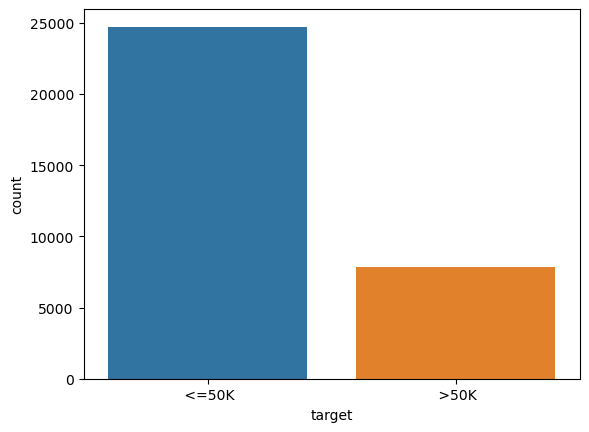

In [92]:
sns.countplot(data= df_transformed , x='target')
plt.show()

In [135]:

X = df_transformed.drop("target", axis =1)
y = df_transformed["target"]

In [136]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

In [138]:
X_over , y_over = undersample.fit_resample(X,y)

 ### Now we check the data 

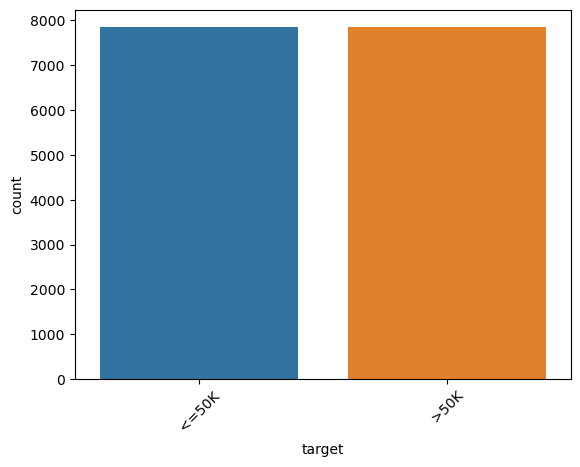

In [126]:
yei=pd.DataFrame(y_over)  ##aqui primero tuve que hacerlo un DF de pandas por que sino no le la variable 
sns.countplot( data= yei, x='target')
plt.xticks(rotation=45)
plt.show()

## Random forest model with scikit-learn

In [139]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_over,y_over, test_size=0.30, random_state=00000)

In [154]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=00000)

In [155]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

Prediction 

In [156]:
#Prediction  with X test data 
y_test_pred = random_forest.predict(X_test)

## Evaluation of Model

In [157]:

from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay

test_accuracy = accuracy_score(y_test, y_test_pred)


print('El accuracy en test es:', test_accuracy)

El accuracy en test es: 0.8102019128586609


In [158]:

feature_importances_df = pd.DataFrame(
    {"feature": X.columns, "importance": random_forest.feature_importances_}).sort_values("importance", ascending = False)

feature_importances_df

,feature,importance
0,age,0.156773
2,fnlwgt,0.139272
7,relationship,0.124561
5,marital-status,0.109160
4,education-num,0.084607
12,hours-per-week,0.084216
10,capital-gain,0.082769
6,occupation,0.066974
3,education,0.043223
1,workclass,0.036339


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'fnlwgt'),
  Text(2, 0, 'relationship'),
  Text(3, 0, 'marital-status'),
  Text(4, 0, 'education-num'),
  Text(5, 0, 'hours-per-week'),
  Text(6, 0, 'capital-gain'),
  Text(7, 0, 'occupation'),
  Text(8, 0, 'education'),
  Text(9, 0, 'workclass'),
  Text(10, 0, 'capital-loss'),
  Text(11, 0, 'sex'),
  Text(12, 0, 'native-country'),
  Text(13, 0, 'race')])

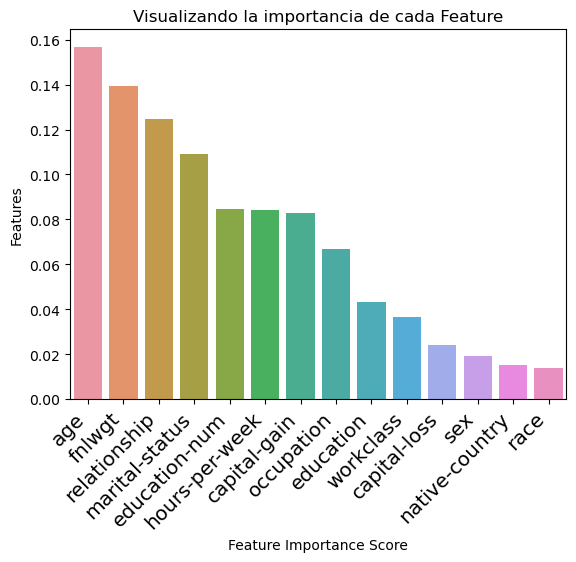

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizando la importancia de cada Feature")
plt.xticks(rotation=45, horizontalalignment = "right", fontweight="light", fontsize="x-large")

## Confusion Matrix

In [160]:
list= random_forest.classes_
list

array([' <=50K', ' >50K'], dtype=object)

<Figure size 1100x1100 with 0 Axes>

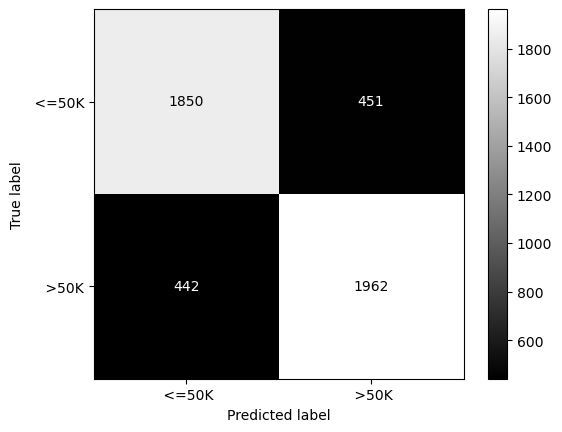

In [161]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, y_test_pred, labels = list)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = list)
disp.plot(cmap='gray')
plt.show()

#  GridSearchCV to find the  best n_estimators for a better classification

In [148]:
##fisrt we establish the parameters we want to evaluate 
param_grid = {
  
    'n_estimators': [5, 10, 15, 100, 200, 300]
}

In [151]:
from sklearn.model_selection import GridSearchCV
random_forest_model = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = random_forest_model , param_grid = param_grid ,n_jobs = -1)

In [ ]:
grid_search.fit(X_train,y_train)

In [162]:
grid_search.best_params_

{'n_estimators': 100}

Now we ncan see n_estimators=100 is the best option 

## We can also try to find the best n_estimator using a  loop and then create graph of the results 

Text(0, 0.5, ' Accuracy')

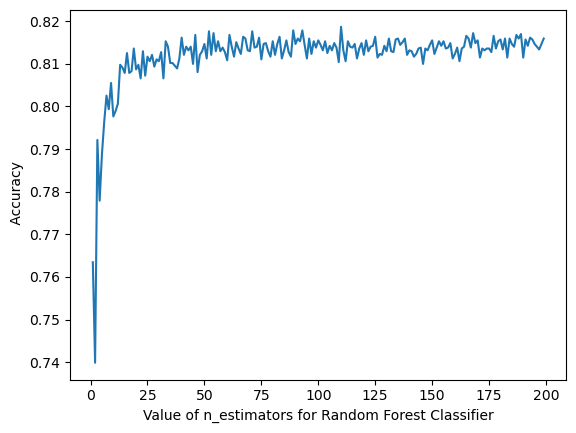

In [166]:
scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel(' Accuracy')

we can apreciate that after n_estimator= 25 the accuracy doesn't change to much  